## ICE-7. MPEG-7 Color Layout Descriptor
Please download the images from the following link:<br>
https://drive.google.com/file/d/1h0JFzpyc7zNZiln5Ls74CfvOfhtl51XK/view?usp=sharing <br><br>
Please refer to the following link for the code of Color Layout Descriptor: <br>
https://github.com/scferrada/imgpedia

## Task 1. Please using the given code to extract the color layout features from the downloaded image 001.jpg, and display it.

In [1]:
from PIL import Image as im
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance


In [5]:
averages = np.zeros((8,8,3))
img = cv2.imread(r"/Users/laptopcheckout/Downloads/ICE-7_data/001.jpg")
imgH, imgW, _ = img.shape
for row in range(8):
    for col in range(8):
        slice = img[imgH//8* row: imgH//8* (row+1), imgW//8*col : imgW//8*(col+1)]
        average_color_per_row = np.mean(slice, axis=0)
        average_color = np.mean(average_color_per_row, axis=0)
        average_color = np.uint8(average_color)
        averages[row][col][0] = average_color[0]
        averages[row][col][1] = average_color[1]
        averages[row][col][2] = average_color[2]
    icon = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)
y, cr, cb = cv2.split(icon)
dct_y = cv2.dct(np.float32(y))
dct_cb = cv2.dct(np.float32(cb))
dct_cr = cv2.dct(np.float32(cr))
dct_y_zigzag = []
dct_cb_zigzag = []
dct_cr_zigzag = []
flip = True
flipped_dct_y = np.fliplr(dct_y)
flipped_dct_cb = np.fliplr(dct_cb)
flipped_dct_cr = np.fliplr(dct_cr)
for i in range(8 + 8 -1):
    k_diag = 8 - 1 - i
    diag_y = np.diag(flipped_dct_y, k=k_diag)
    diag_cb = np.diag(flipped_dct_cb, k=k_diag)
    diag_cr = np.diag(flipped_dct_cr, k=k_diag)
    if flip:
        diag_y =  diag_y[::-1]
        diag_cb = diag_cb[::-1]
        diag_cr = diag_cr[::-1]
    dct_y_zigzag.append(diag_y)
    dct_cb_zigzag.append(diag_cb)
    dct_cr_zigzag.append(diag_cr)
    flip = not flip
array=np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])
array

array([ 7.54875000e+02, -3.71453323e+01, -2.75390893e-01, -2.05506821e+02,
        7.78468102e-02, -2.34176540e+01, -3.93178177e+01,  3.43435440e+01,
        2.75409832e+01, -5.34272051e+00, -4.38750000e+01,  5.65796041e+00,
        2.59727240e+00, -2.54444008e+01, -1.43750000e+01, -2.34878922e+01,
        2.55022869e+01,  2.20043163e+01, -3.80048065e+01, -5.47946072e+00,
        6.65629059e-02,  5.35990372e+01, -1.31532040e+01,  2.22179368e-01,
        4.08514328e+01, -2.71923709e+00, -2.33335533e+01, -7.21246767e+00,
       -2.86610723e+00,  1.22206163e+01,  3.80418777e+00, -3.12251759e+01,
        3.03049412e+01,  1.38942504e+00,  7.60543251e+00,  1.85286961e+01,
        1.82548904e+01, -2.60280678e-03, -1.26275692e+01,  2.58750000e+01,
        2.63148155e+01, -3.00260210e+00, -2.30272079e+00, -2.49541059e-01,
       -1.75480080e+01,  2.62883568e+01,  8.04879284e+00, -2.93222847e+01,
        1.81053467e+01, -1.63744450e+01, -1.93038082e+01,  1.69019365e+00,
        8.70240688e+00,  

## Task 2. Retrieve the image that is the most similar to image 001.jpg from the downloaded images (not itself).
Please try to use at least three different metrics to measure the distance between color layout descriptors (L1 distance, L2 distance, earth mover's distance, etc)

In [11]:
dat=[]
entries = os.listdir(r"/Users/laptopcheckout/Downloads/ICE-7_data")
path = r"/Users/laptopcheckout/Downloads/ICE-7_data"
for entry in entries:
    pat = path + '/' + entry
    da = cv2.imread(pat)
    dat.append(da)
array=[0]*len(dat)
icon=[0]*len(dat)
l1dist=[0]*len(dat)
l2dist=[0]*len(dat)
canb=[0]*len(dat)
for m in range(0,len(dat)):
    averages = np.zeros((8,8,3))
    img = dat[m]
    #print(img)
    imgH, imgW, _ = img.shape
    for row in range(8):
        for col in range(8):
            slice = img[imgH//8* row: imgH//8* (row+1), imgW//8*col : imgW//8*(col+1)]
            average_color_per_row = np.mean(slice, axis=0)
            average_color = np.mean(average_color_per_row, axis=0)
            average_color = np.uint8(average_color)
            averages[row][col][0] = average_color[0]
            averages[row][col][1] = average_color[1]
            averages[row][col][2] = average_color[2]
        icon[m] = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)
    y, cr, cb = cv2.split(icon[m])
    dct_y = cv2.dct(np.float32(y))
    dct_cb = cv2.dct(np.float32(cb))
    dct_cr = cv2.dct(np.float32(cr))
    dct_y_zigzag = []
    dct_cb_zigzag = []
    dct_cr_zigzag = []
    flip = True
    flipped_dct_y = np.fliplr(dct_y)
    flipped_dct_cb = np.fliplr(dct_cb)
    flipped_dct_cr = np.fliplr(dct_cr)
    for i in range(8 + 8 -1):
        k_diag = 8 - 1 - i
        diag_y = np.diag(flipped_dct_y, k=k_diag)
        diag_cb = np.diag(flipped_dct_cb, k=k_diag)
        diag_cr = np.diag(flipped_dct_cr, k=k_diag)
        if flip:
            diag_y =  diag_y[::-1]
            diag_cb = diag_cb[::-1]
            diag_cr = diag_cr[::-1]
        dct_y_zigzag.append(diag_y)
        dct_cb_zigzag.append(diag_cb)
        dct_cr_zigzag.append(diag_cr)
        flip = not flip
    array[m]=np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])
    l1dist[m] = np.linalg.norm(array[0]-array[m],ord=1)
    l2dist[m] = np.linalg.norm(array[0]-array[m],ord=2)
    canb[m] = distance.canberra(array[0],array[m])
    
print("USING L1-DISTANCE : ", l1dist)
print("USING L2-DISTANCE : ", l2dist)
print("USING canberra DISTANCE : ", canb)

    
    

USING L1-DISTANCE :  [0.0, 3511.4578, 3916.378, 3434.9905, 3527.9136, 3642.985, 3692.3682, 4668.9565, 4574.628, 4370.5596, 4887.61, 4192.49, 5050.358, 4385.842, 4248.0063, 4097.6973, 4374.43]
USING L2-DISTANCE :  [0.0, 523.92554, 573.2172, 448.84296, 525.6263, 455.80807, 528.3162, 661.23065, 645.3441, 582.795, 797.1374, 578.7167, 828.87335, 607.90704, 755.3271, 612.58795, 554.1029]
USING canberra DISTANCE :  [0.0, 138.35932971970396, 146.98437739433746, 132.1721504336414, 129.8657086254776, 134.82064202305943, 138.59532906321283, 141.0144226014512, 143.6005702668242, 138.92839012775983, 140.0377565218102, 139.4833566462635, 142.80852064249996, 144.8835248685686, 150.26961535605398, 127.1923462238963, 133.74569011287406]


Text(0.5, 1.0, 'Matching image')

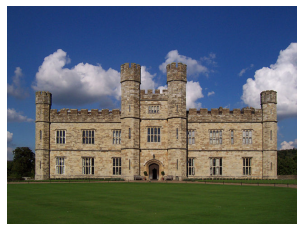

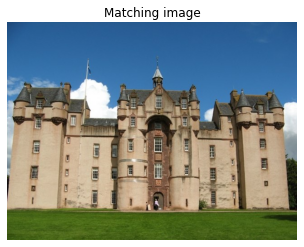

In [13]:
img=dat[0]
plt.figure()
plt.axis("off")
plt.imshow(img[:,:,::-1])
img=dat[1]
plt.figure()
plt.axis("off")
plt.imshow(img[:,:,::-1])
plt.title("Matching image")

## Question 1. Please answer if the outputs of Task 2 are the same. If the outputs are different, based on your perspective, which metrics gives the most similar retrieval? If the outputs are the same, do you think we can use any metrics to compare the color layout features in any cases? Give an explanation to your answer.

**Answer to Q1**: type your answer here
As we can see in the outputs, are similar.We can use any metrics to calculate, which ofcourse can be concluded from the output of distances.In the above outputs of L1 distance,L2 distance,canberra DISTANCE the values may be different but the variation in difference is similar.
Hence by this we could conclude that any metrics to revival.Moreover the logic behind the distance calculation for the 3 methods gives similar variation.

---